# Knowledge Inference

Simon Chen

Objectives:

- identify common knowledge inference (e.g., BTK, LTK, IRT) packages
- fit a basic knowledge inference model to some student interaction data (e.g., BTK or IRT).

## Basic Ideas Behind Knowledge Inference
For several decades now, assessment has become an increasingly pressing educational priority. The purpose for the assessment technologies in learning is often to use a series of well-designed challenges/tasks/questions to infer students' mastery of knowledge or cognitive capacity in general. The task sounds simple, but we all have experienced things such as test anxiety, luck, slip, ect. during a test. So, the simplistic assessment model of adding everything up may not be a very good way to estimate one's knowledge. A lot of research in the educational world (not only LA/EDM but also psychometrics) has been done on this problem of evaluating whether a student knows or doesn't know something based on the data we can obtain -- hence knoweldge inference.

## Knowledge Tracing
There are a lot of different types of knowledge inference models and one of the best-known model that's been used in the field of educational data mining is Knowledge Tracing. Knowledge tracing is a type of Latent knowledge estimation. But, why do we call it Latent Knowledge Estimation? Well, the reason why we use the word latent is because we have no way of actually directly observing whether a student knows something or not. We can't really well go and look at the student's brain to see if they have the right connection. And we can't really ask the student either because although some students are going to be really good at telling us what they do know and don't know, some other student might think that they know something but they don't actually, or they might not realize that they know something when they do know. And so, we need to assess or estimate something that can't be absurd and that's why we call it latent. So, we can't observe the knowledge itself, but what we can observe is whether the student is able to apply a knowledge component in a specific context. And this will give us indirect information about whether or not the student knows this knowledge component.
The idea behind knowledge tracing is based of probablistic statistics: (a) What we want to infer is not definitively whether the student knows or not; what we want to infer the probablity of them knowing. And the probablity of knowing will impact the result of student answering a question correctly. (b) There are other factors that might impact the result (e.g., guessing, making a slip). So let's all include these in our knowledge tracing model. There are different implementation of knowledge tracing (e.g., Bayesian Knowledge Tracing, Logistic Knowledge Tracing) and here is a interactive module for you to learn more about BKT: https://www.cs.williams.edu/~iris/res/bkt-balloon/index.html#start
Here is a thorough tutorial GitHub repo (data included) for BKT in Python by Badrinath et al. (2021). So I am not going to reinvent the wheel:
Quick start: https://colab.research.google.com/drive/13abu919edUXbvPV3qeGPpvwnFBExU7Vd More comprehensive tutorial notebook: https://colab.research.google.com/drive/13abu919edUXbvPV3qeGPpvwnFBExU7Vd#scrollTo=qkiQ1CbrWbrQ

# pyBKT Model Tutorial

This is a tutorial that explores the basic features of pyBKT, ranging from model creation, fitting, prediction, evaluation and crossvalidation. We will be using the skills contained within the Cognitive Tutor and 2009-2010 Assistments datasets to demonstrate these features.

In [2]:
# Install pyBKT from pip!
!pip install pyBKT

# Import all required packages including pyBKT.models.Model!
import numpy as np
import pandas as pd
from pyBKT.models import Model
import matplotlib.pyplot as plt

     |████████████████████████████████| 32.7 MB 286 kB/s 
  Created wheel for pyBKT: filename=pyBKT-1.4-cp37-cp37m-linux_x86_64.whl size=1024759 sha256=2599882a8db5b070e81587a0af6805eea680aa93847b0e9ec47028c0dc84dc29
  Stored in directory: /root/.cache/pip/wheels/d4/bb/83/0fe92b544252ddb34ad6bf4fd2659abd64140612b2d418cd07
Successfully built pyBKT


### Basic Model Creation and Evaluation

Initialize the model with an optional seed and number of fit initializations. Note that the Model constructor supports many more parameters such as the model variant (which can be modified at fit time), whether to parallelize computation, and more.

In [3]:
# Note that the seed chosen is so we can consistently
# replicate the results and avoid as much randomness
# as possible.
model = Model(seed = 42, num_fits = 1)

Fetch Assistments and CognitiveTutor data to the local disk. We will be using these datasets, but you can use any that you see fit when you use pyBKT. The data formats accepted by pyBKT are comma separated and tab separated files (note that pyBKT will automatically infer which is passed in). Note that the correctness is given by -1 (no response), 0 (incorrect), or 1 (correct).

In [4]:
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/as.csv', '.')
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

We open the given datasets and explore them before using them to fit BKT models using pyBKT. Note that the column names describing the student ID, the problem name, the response's correctness and skill name all differ between the two datasets.

In [5]:
ct_df = pd.read_csv('ct.csv', encoding = 'latin')
print(ct_df.columns)
ct_df.head(5)

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')


,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,NaN,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,NaN,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,NaN,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,NaN,13.00000,0,1,0,1,Calculate unit rate,5


In [6]:
as_df = pd.read_csv('as.csv', encoding = 'latin', low_memory = False)
print(as_df.columns)
as_df.head(5)

Index(['order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id',
       'original', 'correct', 'attempt_count', 'ms_first_response',
       'tutor_mode', 'answer_type', 'sequence_id', 'student_class_id',
       'position', 'type', 'base_sequence_id', 'skill_id', 'skill_name',
       'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time',
       'template_id', 'answer_id', 'answer_text', 'first_action',
       'bottom_hint', 'opportunity', 'opportunity_original'],
      dtype='object')


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,...,0,3,32454,30799,NaN,26,0,NaN,1,1.00000
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,...,0,3,4922,30799,NaN,55,0,NaN,2,2.00000
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1.00000
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,...,0,3,4859,30059,NaN,41,0,NaN,2,2.00000
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,NaN,65,0,0.00000,3,3.00000


We can fit a simple BKT model with the `fit` method for the Model class. In this case, we will fit a BKT model to every skill in the Cognitive Tutor dataset separately. Note that when skill(s) are not specified, it trains a separate model on all skills by default.

We can either specify a data path (location of a file) or the Pandas DataFrame containing the data.

In [7]:
model.fit(data_path = 'ct.csv')

We can train on multiple skills specified by a list of skill names or a 
REGEX match for each skill using the `skills` parameter. We demonstrate the usage of that below. In this case, we fit on all strings containing fraction.

In [8]:
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
print("Fitted Skills:\n%s" % '\n'.join(model.coef_.keys()))

Fitted Skills:
Plot non-terminating improper fraction
Plot terminating proper fraction
Calculate part in proportion with fractions
Calculate total in proportion with fractions


Evaluate on the trained skills for any test data located in a Pandas DataFrame or in a file. In this case, we will just use training data, so this will display the training error. Note that the default metric displayed is RMSE. pyBKT supports AUC, RMSE, and accuracy
as metrics by default.

However, you can define your own custom metric as well!

In [9]:
# Evaluate with the default RMSE then specify AUC.
model.fit(data_path = 'ct.csv')
training_rmse = model.evaluate(data = ct_df)
training_auc = model.evaluate(data_path = "ct.csv", metric = 'auc')
print("Training RMSE: %f" % training_rmse)
print("Training AUC: %f" % training_auc)

Training RMSE: 0.454051
Training AUC: 0.706429


In [10]:
# We can even define our own metric!
def mae(true_vals, pred_vals):
  """ Calculates the mean absolute error. """
  return np.mean(np.abs(true_vals - pred_vals))

training_mae = model.evaluate(data_path = 'ct.csv', metric = mae)
print("Training MAE: %f" % training_mae)

Training MAE: 0.412765


### Model Prediction

pyBKT can return predictions on a test set given a Pandas DataFrame or a file conaining test data. If pyBKT is asked for predictions on skills for which it has not trained a model, it will output a best effort guess of 0.5 for both the correct and state predictions.

We will be using the training dataset again for testing purposes.

In [11]:
# Note again that the REGEX expression below trains BKT models on all
# skills containing the word fraction!
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
preds = model.predict(data_path = 'ct.csv')
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']].head(5)

,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
773,0I891Gg,Plot non-terminating improper fraction,0,0.51766,0.74989
774,0I891Gg,Plot imperfect radical,0,0.50000,0.50000
775,0I891Gg,Plot terminating proper fraction,0,0.49512,0.52522
776,0I891Gg,Plot pi,1,0.50000,0.50000
777,0I891Gg,Plot terminating proper fraction,1,0.44597,0.40101


In [12]:
# Let's sanity check that we have only trained on the skills that we 
# specified in the call to fit! Note that while it is possible for a 
# BKT prediction to be 0.5 exactly, it is unlikely.
preds[preds['correct_predictions'] != 0.5]['KC(Default)'].unique()

array(['Plot non-terminating improper fraction',
       'Plot terminating proper fraction',
       'Calculate part in proportion with fractions',
       'Calculate total in proportion with fractions'], dtype=object)

In [13]:
# Let's manually calculate the RMSE of the correct predictions 
# and ensure that it is the same as a call to the evaluate function.
def rmse(y_true, y_pred):
  """ Returns the root-mean squared error. """
  return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Filter out the data for which we did not train!
preds_filtered = preds[preds['KC(Default)'].str.contains('fraction')]
manual_training_rmse = rmse(preds_filtered['Correct First Attempt'],
                            preds_filtered['correct_predictions'])
manual_training_rmse

0.4408192854359997

In [14]:
# We use model.evaluate to accomplish the same thing!
# You should receive an RMSE that is identical to the above
# manually calculated RMSE.
model.evaluate(data = ct_df)

0.4408192854359973

### Model Cross-Validation and Variants

Crossvalidation is offered as a blackbox function similar to a combination of fit and evaluate that accepts a particular number of folds, a seed, and a metric (either one of the 3 provided that are 'rmse', 'auc' or 'accuracy' or a custom Python function taking 2 arguments). Similar arguments for the model types, data path/data, and skill names are accepted as with the fit function.

In [15]:
# Note that folds is an optional parameter as well as the model 
# variant, seed, and crossvalidated metric.
# By default, we crossvalidate on all skills separately.
model.crossvalidate(data_path = 'ct.csv', folds = 5)

,rmse
skill,
Plot non-terminating improper fraction,0.48534
Plot imperfect radical,0.43577
Plot terminating proper fraction,0.49749
Plot pi,0.45946
Plot whole number,0.28967
Plot decimal - thousandths,0.47286
Calculate unit rate,0.48344
Calculate part in proportion with fractions,0.42736
Calculate total in proportion with fractions,0.42400


We explore all the model variants offered within pyBKT for one particular skill (Calculations with Similar Figures) using cross-validation since it provides a much better evaluation of true model performance during test time than the training loss!

In [16]:
# Try this with a different skill or metric by replacing the lines below.
skill = 'Calculations with Similar Figures'
metric = 'auc'

simple_cv = model.crossvalidate(data = as_df, skills = skill, 
                                metric = metric)
simple_cv

,auc
skill,
Calculations with Similar Figures,0.59557


The multigs model fits a different guess/slip rate for each class. Note that by default, for the CognitiveTutor data, the guess and slip classes will be specified by the template_id. pyBKT will be able to infer the column names for AS/CT type datasets, but you can specify a custom column mapping (discussed in later cells).

In [17]:
multigs_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                 multigs = True, metric = metric)
multigs_cv

,auc
skill,
Calculations with Similar Figures,0.63757


The multilearn model fits a different learn rate (and forget rate if enabled) rate for each class specified. Note that the learn classes are specified by the template_id column by default for the Assistments dataset.

In [18]:
multilearn_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multilearn = True, forgets = True, 
                                    metric = metric)
multilearn_cv

,auc
skill,
Calculations with Similar Figures,0.61694


The multilearn model fits a different learn (and forget if enabled) rate for each class, and the multipair model generates a different learn rate based on each consecutive pair of classes. 

In [19]:
# The multiprior model generates different priors based on the first 
# response of each student.
multiprior_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multiprior = True, metric = metric,
                                    folds = 3)
multipair_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                   multipair = True, metric = metric,
                                   folds = 3)
pd.concat([multiprior_cv, multipair_cv], axis = 0)

,auc
skill,
Calculations with Similar Figures,0.60335
Calculations with Similar Figures,0.58728


The best performing models are typically those that combine several useful variants such as the multilearn and multiguess/slip class variants. We will enable the forgets parameter as well. Try testing with other skills and see whether this holds true for the general case.

In [20]:
# We combine the fifth parameter, forgets, with the previous multilearn
# and multiguess/slip models for a combo model.
combo_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                               forgets = True, multilearn = True, 
                               multigs = True, metric = metric)
combo_cv

,auc
skill,
Calculations with Similar Figures,0.63850


### Model Parameter Initialization and Visualization

We can initialize any of the model parameters for a particular skill's BKT model before training using `model.coef_`. Similar to SciKit Learn, `model.coef_` is a way to initialize model parameters and view them after they are fitted.


In [21]:
# We initialize the prior parameter to 1e-3 for the Box and Whisker 
# skill.
#
# Note that if we are training a KT-IDEM (multiguess/slip) model,
# we need to have len(guesses) == len(slips) == # of G/S classes.
# Similarly, for multilearn models, you need len(forgets) == len(guesses)
# corresponding to the number of learn classes.
skill = 'Box and Whisker'

model.coef_ = {skill: {'prior': 1e-40}}
model.coef_

{'Box and Whisker': {'prior': 1e-40}}

In [22]:
# Train the model with the pre-initialized parameters.
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
low_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

# We can obtain the prior value by indexing into the model.coef_
# dictionary with the skill and parameter names. 
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % low_prior_auc)

Fitted Prior Value: 0.000000
Training AUC: 0.631701


In [23]:
# Initialize the prior to be more reasonable.
model.coef_ = {skill: {'prior': 0.5}}
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
normal_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

# Print the fitted prior value and RMSE.
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % normal_prior_auc)

Fitted Prior Value: 0.005060
Training AUC: 0.638649


We can visualize the parameters of our fitted model in a Pandas DataFrame once it has been fit. We can easily plot the learn, forget, guess, and slip rates for multilearn/forget and multiguess/slip models. 

In [24]:
model.fit(data_path = 'as.csv', skills = skill,
          forgets = True, multilearn = True, 
          multigs = True)
model.params()

value
skill           param   class          
Box and Whisker prior   default 0.49627
                learns  30059   0.44539
                        30060   0.45185
                        30799   0.40828
                        63446   0.41907
                        63447   0.39079
                        63448   0.37103
                guesses 30059   0.54358
                        30060   0.35476
                        30799   0.40031
                        63446   0.41572
                        63447   0.25500
                        63448   0.45865
                slips   30059   0.01268
                        30060   0.03288
                        30799   0.01975
                        63446   0.02531
                        63447   0.03944
                        63448   0.02071
                forgets 30059   0.25721
                        30060   0.24959
                        30799   0.23444
                        63446   0.26725
                        63447   0.25713
                        63448   0.32113

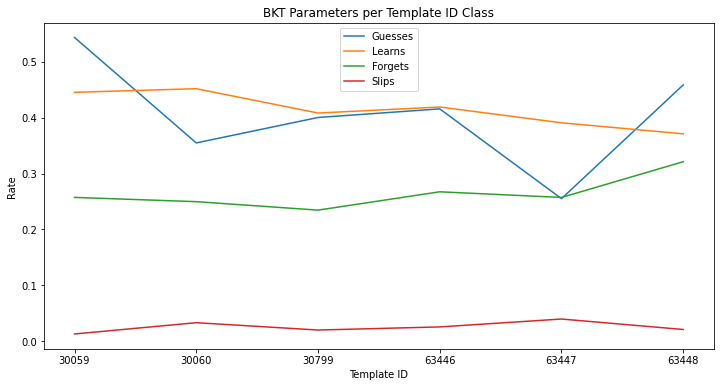

In [25]:
# We will get warnings for using indexing past lexsort. That's fine,
# and we will disable these warnings.
import warnings
warnings.simplefilter(action='ignore')

# Plot the learns, forgets, slips and guesses for each of the classes.
params = model.params()
plt.figure(figsize = (12, 6))
plt.plot(params.loc[(skill, 'guesses')], label = 'Guesses')
plt.plot(params.loc[(skill, 'learns')], label = 'Learns')
plt.plot(params.loc[(skill, 'forgets')], label = 'Forgets')
plt.plot(params.loc[(skill, 'slips')], label = 'Slips')
plt.xlabel('Template ID')
plt.ylabel('Rate')
plt.title('BKT Parameters per Template ID Class')
plt.legend();

### Extended Data and Model Configuration

Models can get excessively long, whether it's due to the number of model variants used, the number of folds/seed/metric for crossvalidation, data path length, etc.

We create a configuration dictionary that describes all the parameters we will pass in. Note that this is not a pyBKT feature, but actually just a Python feature that not many realize is very powerful!

In [26]:
config = {'multigs': True,
          'multilearn': True,
          'skills': ['Box and Whisker', 'Circle Graph'],
          'forgets': True,
          'metric': 'accuracy',
          'folds': 4,
          'seed': 42 * 42}
model.crossvalidate(data_path = 'as.csv', **config)

,accuracy
skill,
Circle Graph,0.67622
Box and Whisker,0.75640


For other non-Assistments/CogTutor style datasets, we will need to specify the
columns corresponding to each required column (i.e. the user ID, correct/incorrect). This is because pyBKT only supports the automatic inference of column names for the AS/CT datasets.

For that, we use a defaults dictionary or specify parameters for each model variant.

In [27]:
# Note that this means that the order_id specified by the column named
# custom_order in our custom dataset, the skill_name is specified by the 
# custom_skill column in our custom dataset, and so on.
defaults = {'order_id': 'custom_order', 
            'skill_name': 'custom_skill', 
            'correct': 'custom_answer'}

# This defaults dictionary can also contain columns specifying
# what columns correspond to the desired guess/slip classes, etc.
defaults['multigs'] = 'custom_gs_classes'

# Our final column mapping is:
defaults

{'correct': 'custom_answer',
 'multigs': 'custom_gs_classes',
 'order_id': 'custom_order',
 'skill_name': 'custom_skill'}

In [28]:
# We'll use this mapping with the modified CogTutor dataset with the names
# we chose for the columns.
#
# Note that Row is the order ID (order_id), KC(Default) is the 
# skill name (skill_name), Correct First Attempt is correct, and 
# Problem Name is the corresponding guess/slip class column.

columns = ['Row', 'Anon Student Id', 'KC(Default)', 
           'Correct First Attempt', 'Problem Name']
my_df = ct_df[columns]
my_df.columns = ['custom_order', 'Anon Student Id',
                 'custom_skill', 'custom_answer',
                 'custom_gs_classes']
my_df['custom_skill'] += ' (Custom)'
my_df.head(5)

,custom_order,Anon Student Id,custom_skill,custom_answer,custom_gs_classes
773,112149,0I891Gg,Plot non-terminating improper fraction (Custom),0,RATIONAL1-014
774,112151,0I891Gg,Plot imperfect radical (Custom),0,RATIONAL1-041
775,112156,0I891Gg,Plot terminating proper fraction (Custom),0,RATIONAL1-104
776,112157,0I891Gg,Plot pi (Custom),1,RATIONAL1-122
777,112159,0I891Gg,Plot terminating proper fraction (Custom),1,RATIONAL1-180


In [29]:
# We can crossvalidate/fit given these default column mappings.
model.crossvalidate(data = my_df, metric = 'auc',
                    defaults = defaults)

,auc
skill,
Plot non-terminating improper fraction (Custom),0.64199
Plot imperfect radical (Custom),0.64055
Plot terminating proper fraction (Custom),0.56805
Plot pi (Custom),0.55551
Plot whole number (Custom),0.54415
Plot decimal - thousandths (Custom),0.62383
Calculate unit rate (Custom),0.59361
Calculate part in proportion with fractions (Custom),0.67153
Calculate total in proportion with fractions (Custom),0.70454


### Sample Case Studies

In [30]:
# Question 1: Which model variant has the smallest training loss for 
# "Venn Diagram" in as.csv?
models = {}

model = Model(seed = 42, num_fits = 1)
model.fit(data_path="as.csv", skills="Venn Diagram")
models['simple'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", multilearn=True)
models['multilearn'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", multigs=True)
models['multigs'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True)
models['forgets'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True, 
          multigs = True)
models['multigs + forgets'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True,
          multilearn = True)
models['multilearn + forgets'] = model.evaluate(data_path="as.csv")

df = pd.DataFrame(models.items())
df.columns = ['model type', 'RMSE']
df.set_index('model type')

,RMSE
model type,
simple,0.33115
multilearn,0.32961
multigs,0.33990
forgets,0.27898
multigs + forgets,0.31429
multilearn + forgets,0.27192


In [31]:
# Question 2: Which columns work the best for the multilearn skills
# below in ct.csv?

skills = ['Calculate unit rate',
          'Calculate part in proportion with fractions']
column_names = ["Anon Student Id", "Problem Hierarchy", "Problem Name", 
                "Problem View", "Step Name", "Correct First Attempt", 
                "Incorrects", "Hints", "Opportunity(Default)"]
model = Model(num_fits = 1)
for skill in skills:
  print("------------------")
  print("SKILL: %s" % skill)
  print("Basic:", model.crossvalidate(data_path="ct.csv", 
                                    skills=skill,
                                    metric = 'auc').iloc[0, 0])
  for i in column_names:
    print("%s:" % i, model.crossvalidate(data_path="ct.csv", 
                                              skills=skill, 
                                              multilearn=i,
                                              metric = 'auc').iloc[0, 0])

------------------
SKILL: Calculate unit rate
Basic: 0.5728081806605655
Anon Student Id: 0.44616096722111925
Problem Hierarchy: 0.5972539294351094
Problem Name: 0.5853643710727592
Problem View: 0.5932639189152014
Step Name: 0.5861652933515088
Correct First Attempt: 0.6006274645452796
Incorrects: 0.5886791328058807
Hints: 0.5877362784024355
Opportunity(Default): 0.5560896023442854
------------------
SKILL: Calculate part in proportion with fractions
Basic: 0.66936403266929
Anon Student Id: 0.47847554608140186
Problem Hierarchy: 0.6706203556744856
Problem Name: 0.6676607539146049
Problem View: 0.669892718336157
Step Name: 0.6707689194822163
Correct First Attempt: 0.6719551752295718
Incorrects: 0.6695348821875259
Hints: 0.6729501390552917
Opportunity(Default): 0.6691428229298927


RMSE Improvement using Resp. Time: 0.002052


,mean learn rate
class,
less than 10s,0.13000
less than 20s,0.19067
less than 30s,0.19717
less than 40s,0.16850
less than 50s,0.17866
other,0.18257


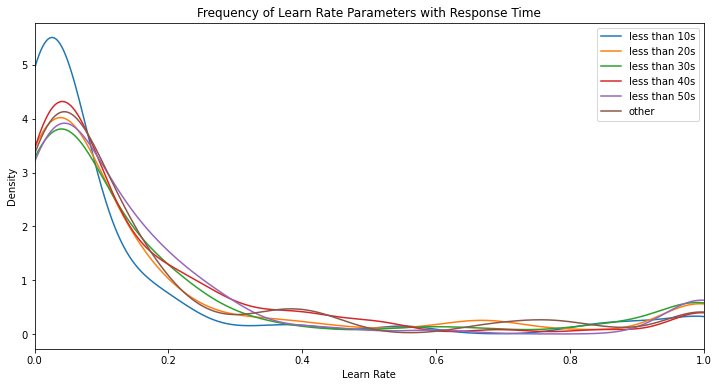

In [32]:
# Question 3: Does binned response time have an effect on the learn rate?
# Does it improve the RMSE of the model compared to the normal template_id
# based multilearn/guess?

as_df = pd.read_csv('as.csv', encoding = 'latin')
learn_maps = {0: 'less than 10s', 
              1: 'less than 20s', 
              2: 'less than 30s', 
              3: 'less than 40s', 
              4: 'less than 50s'}
as_df['resp_t'] = (as_df['ms_first_response'] // 10000) \
                  .map(learn_maps).fillna('other')
model.fit(data = as_df, multilearn = 'resp_t')
params_df = model.params().reset_index()
plt.figure(figsize = (12, 6))
params_df[params_df['param'] == 'learns'].groupby('class')['value'] \
                                         .plot.kde(bw_method=0.2)
plt.xlim((0, 1))
plt.legend()
plt.title('Frequency of Learn Rate Parameters with Response Time')
plt.xlabel('Learn Rate')

simple_rmse = model.crossvalidate(data = as_df)
resptime_combo_rmse = model.crossvalidate(data = as_df,
                                              multigs = 'resp_t',
                                              multilearn = 'resp_t')
normal_combo_rmse = model.crossvalidate(data = as_df,
                                        multigs = True,
                                        multilearn = True)
rmse_diff = (resptime_combo_rmse - normal_combo_rmse)['rmse'].mean()
print("RMSE Improvement using Resp. Time: %f" % rmse_diff)
params_df[params_df['param'] == 'learns'].groupby('class') \
                                         .mean()[['value']] \
                                         .rename(columns = {'value': 
                                                  'mean learn rate'})

### Summary

The following is a summary of most of the key features of BKT.

In [34]:
# Let's summarize.
def mae(true_vals, pred_vals):
  """ Calculates the mean absolute error. """
  return np.mean(np.abs(true_vals - pred_vals))

# This code fetches data, fits, predicts, evaluates and crossvalidates
# a BKT model on all skills in Cognitive Tutor. It uses the mean absolute
# error as the desired error metric.
model = Model(seed = 42, num_fits = 5)
model.fit(data_path = 'ct.csv')
preds_df = model.predict(data_path = 'ct.csv')
mae_error = model.evaluate(data_path = 'ct.csv', metric = mae)
cv_errors = model.crossvalidate(data_path = 'ct.csv', metric = mae)
params_df = model.params()
print("Training MAE: %f" % mae_error)
cv_errors

ValueError: ignored

## Item-Reponse Theory
Item-response theory represent a different approach to infer latent knoledge. Instead of viewing the response (of a particular task) being an probablistic outcome of knowledge, we can assume that the response changes as a function of knowledge/ability and task difficulty. So this assumption help us model someone's knowledge in a more logistic way. Similarly, we can model more factors such as guessing in knowledge tracing. But the nice thing about IRT is the result gives us not only an estimation of someone's knwoledge state, but also an estimation on task difficulty. In fact, what IRT model initially estimate the the task difficulty, which is a very important issue in the psychometrics world. And once task difficulty is obtained, we then infer the respondents' ability.
Again, here is a tutorial on implementing IRT (as well as simulating some data for testing purpose) in Python: https://mc-stan.org/events/stancon2017-notebooks/stancon2017-groves-irt.html

## End Notes
Overall, you might find this ICE much more math-heavy and less-guided compared to the previous weeks. Part of the reason is knowledge tracing is not a frequently-used method outside of the EDM field. Although the model behind it (e.g., HMM, logistic model) are not new, the implementation requires a lot more manual assembly. With that being said, I hope you can try to check out the math and model implementation in the papers (at least get the gist of it). Walk through the online tutorials on implementation(s) with the provided/simulated data. Feel free to use other resources/packages/papers if you need to. Diving into one of the models is fine.